# Read me

Variables are regridded onto 0.5 vertical resolution grid. Oxygen values with NaN are interpolated with surrounding dives.  


# Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
import pandas as pd
import csv
import sys
import array
import xarray as xr
import cmocean.cm as cmocean
def write_with_byte_inversion(f, tab):
    tab2write = array.array('f', tab.T.flatten())
    if sys.byteorder == 'little':
        tab2write.byteswap()
    f.write(tab2write)

dtype=np.float32
#topo_adjust to topo wi
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FuncFormatter
import pathlib
from pathlib import Path
import os
import netCDF4
from netCDF4 import Dataset as nc
import glob
from glob import glob
import glidertools as gt
import gsw
import xarray as xr
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

In [4]:
ds_work = xr.open_dataset('ds_backsc.nc')
ds_work

<xarray.Dataset>
Dimensions:          (sg_data_point: 1011760)
Coordinates:
    longitude        (sg_data_point) float64 ...
    latitude         (sg_data_point) float64 ...
    ctd_depth        (sg_data_point) float64 ...
    ctd_time_dt64    (sg_data_point) datetime64[ns] ...
    distance         (sg_data_point) float64 ...
    tot_distance     (sg_data_point) float64 ...
    dives            (sg_data_point) float64 ...
Dimensions without coordinates: sg_data_point
Data variables:
    temp             (sg_data_point) float64 ...
    salinity         (sg_data_point) float64 ...
    o2               (sg_data_point) float64 ...
    pressure         (sg_data_point) float64 ...
    spectral_slope   (sg_data_point) float64 ...
    backscatter_470  (sg_data_point) float64 ...
    backscatter_700  (sg_data_point) float64 ...
    chlorophyll      (sg_data_point) float64 ...
Attributes:
    description:  dataset including QC and calibrated variables

# Obtain vertical resolution 

Text(0, 0.5, 'counts')

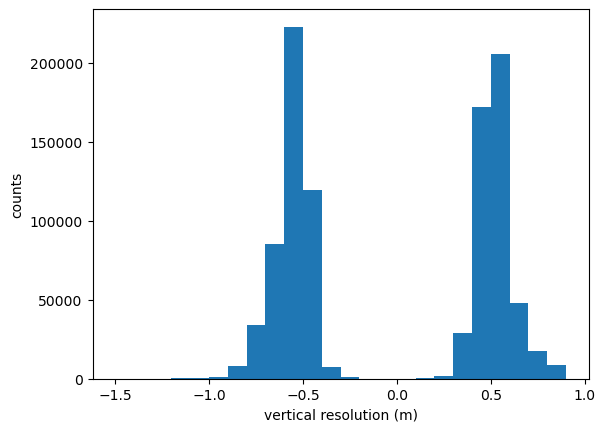

In [4]:
ds_o2 = ds_work.o2.isel(sg_data_point=ds_work.o2>0)
plt.hist(ds_o2.ctd_depth.diff(dim='sg_data_point'),bins = np.arange(-1.5,1,0.1))
plt.xlabel('vertical resolution (m)')
plt.ylabel('counts')


# Grid in depth

In [6]:
# grid
depth = np.arange(-0.25, 1000.75, 0.5)  # Modify the depth array
temp = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.temp, bins=depth)
sal = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.salinity, bins=depth)
o2 = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.o2, bins=depth)
#time = gt.grid_data(ds_work.dives, ds_work.ctd_depth, average_ctd_time, bins=depth) 
p = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.pressure, bins=depth)
spectral_slope = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.spectral_slope, bins=depth)
backscatter_470 = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.backscatter_470, bins=depth)
backscatter_700 = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.backscatter_700, bins=depth)
chl = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.chlorophyll, bins=depth)



Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


# interpolate NaN values in Oxygen with neighbouring dives. 

In [7]:
import numpy as np

# Iterate over each depth level
for depth in np.unique(o2['ctd_depth']):
    # Select the profile for the current depth level
    profile = o2.sel(ctd_depth=depth)
    
    # Find NaN values in the profile
    nan_indices = np.isnan(profile)

    # Iterate over NaN indices, excluding the first and last values
    for j in range(1, len(profile) - 1):
        if nan_indices[j]:
            # Find neighboring indices
            index_left = j - 1
            index_right = j + 1

            # Check if neighboring values are not NaN
            if not np.isnan(profile[index_left]) and not np.isnan(profile[index_right]):
                # Interpolate the NaN value
                profile[j] = (profile[index_left] + profile[index_right]) / 2

# Now `o2` should have the NaN values interpolated based on the neighboring non-NaN values, excluding the first and last values in each profile



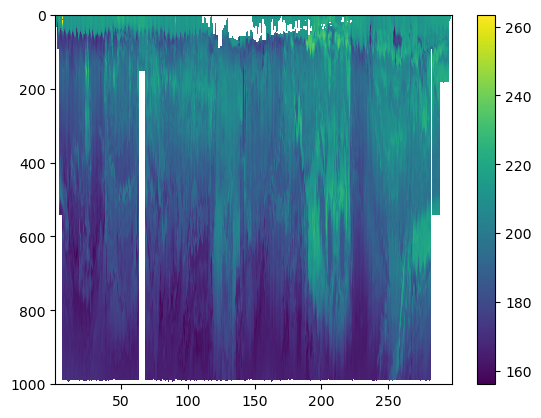

In [7]:
plt.pcolormesh(o2.dives, o2.ctd_depth, o2)
plt.colorbar()
plt.gca().invert_yaxis()

# Obtain horizontal resolution

Distance based on Along Track Distance

In [8]:
average_latitude = ds_work.latitude.groupby('dives').mean()
average_longitude = ds_work.longitude.groupby('dives').mean()

distances = gsw.distance(average_longitude, average_latitude)/1000

cumulative_distance = np.cumsum(distances)
cumulative_distances = np.append(0,  cumulative_distance)

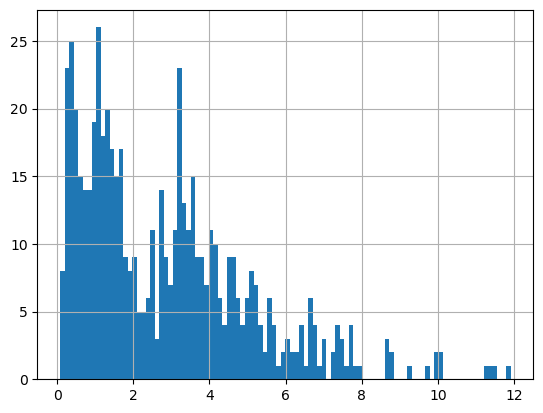

In [9]:

plt.hist(distances, bins=100)
plt.grid()

Distance based on current

In [10]:
ds_work['tot_distance'] = np.cumsum(ds_work.distance)

In [11]:
# Ensure 'tot_distance' is aligned with 'sg_data_point' by using DataArray with the correct dimension
#tot_distance_da = xr.DataArray(ds_work['tot_distance'].data, dims=['sg_data_point'], coords={'sg_data_point': ds_work['sg_data_point']})
tot_distance_da = ds_work.tot_distance

# Group by 'dives' and calculate the mean of 'tot_distance'
mean_tot_distance_per_dive = tot_distance_da.groupby(ds_work['dives']).mean()

# Display the result
mean_tot_distance_per_dive


<xarray.DataArray 'tot_distance' (dives: 592)>
array([3.24245583e-02, 1.01366968e-01, 2.40026928e-01, 4.50285861e-01,
       6.42578104e-01, 8.25134103e-01, 1.28847002e+00, 2.04069053e+00,
       2.92287782e+00, 3.87090338e+00, 5.32583362e+00, 7.28708278e+00,
       9.15654773e+00, 1.14069210e+01, 1.34175657e+01, 1.55508569e+01,
       1.71673400e+01, 1.84765002e+01, 1.97112578e+01, 2.10095537e+01,
       2.25019088e+01, 2.46661928e+01, 2.63283307e+01, 2.76790002e+01,
       2.89553637e+01, 3.02465077e+01, 3.14995610e+01, 3.27892985e+01,
       3.41581552e+01, 3.56794203e+01, 3.71257673e+01, 3.86526588e+01,
       4.01229350e+01, 4.16647895e+01, 4.31362950e+01, 4.46515549e+01,
       4.61595412e+01, 4.76812547e+01, 4.91848369e+01, 5.07620755e+01,
       5.22389771e+01, 5.38053567e+01, 5.52989707e+01, 5.68553999e+01,
       5.83094551e+01, 5.98225794e+01, 6.12503182e+01, 6.27230988e+01,
       6.41634981e+01, 6.56725431e+01, 6.70754066e+01, 6.84912589e+01,
       6.99120123e+01, 7.13387170e+01, 7.27651653e+01, 7.43038191e+01,
       7.57597094e+01, 7.72053637e+01, 7.86403466e+01, 8.01128988e+01,
       8.15756568e+01, 8.30666214e+01, 8.45431776e+01, 8.60509453e+01,
       8.75252871e+01, 8.90338272e+01, 9.05298859e+01, 9.20158688e+01,
       9.35371915e+01, 9.50468173e+01, 9.65515590e+01, 9.80164667e+01,
       9.95307065e+01, 1.01055349e+02, 1.02556976e+02, 1.04068892e+02,
       1.05565428e+02, 1.07072427e+02, 1.08546587e+02, 1.10075191e+02,
...
       7.31707611e+02, 7.33116095e+02, 7.34582616e+02, 7.35922056e+02,
       7.37385471e+02, 7.38746251e+02, 7.40197930e+02, 7.41607401e+02,
       7.43026826e+02, 7.44336256e+02, 7.45709102e+02, 7.47053773e+02,
       7.48493862e+02, 7.49906099e+02, 7.51368194e+02, 7.52786810e+02,
       7.54253559e+02, 7.55631754e+02, 7.57100813e+02, 7.58499378e+02,
       7.59968976e+02, 7.61350175e+02, 7.62789725e+02, 7.64165038e+02,
       7.65611662e+02, 7.67023104e+02, 7.68500178e+02, 7.69893461e+02,
       7.71346730e+02, 7.72718073e+02, 7.74172068e+02, 7.75618396e+02,
       7.77077957e+02, 7.78461448e+02, 7.79926834e+02, 7.81308858e+02,
       7.82752760e+02, 7.84175484e+02, 7.85660855e+02, 7.87069522e+02,
       7.88520961e+02, 7.89958072e+02, 7.91439103e+02, 7.92854153e+02,
       7.94323891e+02, 7.95724592e+02, 7.97186985e+02, 7.98565646e+02,
       7.99370807e+02, 7.99509973e+02, 7.99975898e+02, 8.00762415e+02,
       8.01573470e+02, 8.02359604e+02, 8.03156929e+02, 8.03932980e+02,
       8.04729751e+02, 8.05525437e+02, 8.06321951e+02, 8.07115356e+02,
       8.07924523e+02, 8.08702434e+02, 8.09242935e+02, 8.09505478e+02,
       8.09785904e+02, 8.10038879e+02, 8.10309755e+02, 8.10568007e+02,
       8.10845053e+02, 8.11097156e+02, 8.11369812e+02, 8.11628745e+02,
       8.11905007e+02, 8.12154445e+02, 8.12432802e+02, 8.12682586e+02,
       8.12888957e+02, 8.13036425e+02, 8.13137764e+02, 8.13215270e+02])
Coordinates:
  * dives    (dives) float64 1.0 1.5 2.0 2.5 3.0 ... 296.0 296.5 297.0 297.5

In [12]:
delta_distance = np.diff(mean_tot_distance_per_dive)
delta_distance

array([0.06894241, 0.13865996, 0.21025893, 0.19229224, 0.182556  ,
       0.46333592, 0.75222051, 0.88218728, 0.94802556, 1.45493024,
       1.96124916, 1.86946495, 2.25037332, 2.01064469, 2.13329119,
       1.6164831 , 1.30916022, 1.2347576 , 1.29829584, 1.49235508,
       2.16428406, 1.66213784, 1.35066955, 1.27636351, 1.29114394,
       1.25305333, 1.28973748, 1.36885668, 1.52126516, 1.44634694,
       1.52689155, 1.47027617, 1.5418545 , 1.47150553, 1.51525992,
       1.50798622, 1.52171356, 1.50358219, 1.57723858, 1.47690158,
       1.56637969, 1.49361399, 1.55642913, 1.45405525, 1.51312433,
       1.42773877, 1.4727806 , 1.44039932, 1.50904498, 1.40286353,
       1.41585229, 1.42075337, 1.42670468, 1.42644829, 1.53865378,
       1.45589037, 1.44565425, 1.43498295, 1.47255216, 1.462758  ,
       1.49096464, 1.47655615, 1.5077677 , 1.47434179, 1.50854012,
       1.49605877, 1.48598284, 1.52132272, 1.50962585, 1.50474166,
       1.46490772, 1.51423974, 1.52464272, 1.50162676, 1.51191

(0.0, 3.0)

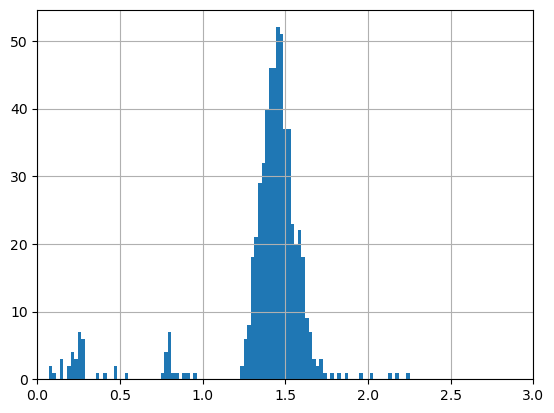

In [12]:
plt.hist(delta_distance, bins=100)
plt.grid()
plt.xlim(0,3)

time

In [13]:
# Calculate the number of days elapsed since the first measurement
average_ctd_time = ds_work.ctd_time_dt64.groupby('dives').mean()
time = average_ctd_time.values
days_elapsed = (time - time[0]) / np.timedelta64(1, 'D')

# Create dataset with time ADT and distance

In [14]:
# creating new dataset with time and Along Track Distance
average_latitude = ds_work.latitude.groupby('dives').mean()
average_longitude = ds_work.longitude.groupby('dives').mean()

#calculate solubility
sol = gsw.O2sol(sal, temp, p, average_longitude, average_latitude)

# Extract the data from the DataArray objects
temp_data = temp.values
salinity_data = sal.values
o2_data = o2.values
sol_data = sol.values
p_data = p.values
spectral_slope_data = spectral_slope.values
backscatter_470_data = backscatter_470.values
backscatter_700_data = backscatter_700.values
chl_data = chl.values

# Get the dimension names for temp, salinity, and o2
temp_dims = temp.dims
salinity_dims = sal.dims
o2_dims = o2.dims
sol_dims = sol.dims
p_dims = p.dims
spectral_slope_dims = spectral_slope.dims
backscatter_470_dims = backscatter_470.dims
backscatter_700_dims = backscatter_700.dims
chl_dims = chl.dims

# Create the Dataset
ds = xr.Dataset(
    data_vars=dict(
        temp=(temp_dims, temp_data),
        salinity=(salinity_dims, salinity_data),
        o2=(o2_dims, o2_data),
        sol=(sol_dims, sol_data),
        p = (p_dims, p_data),
        spectral_slope = (spectral_slope_dims, spectral_slope_data),
        backscatter_470 = (backscatter_470_dims, backscatter_470_data),
        backscatter_700 = (backscatter_700_dims, backscatter_700_data),
        chl = (chl_dims, chl_data),
        
    ),
    coords=dict(
        dives=o2.dives,
        ctd_depth=o2.ctd_depth,
        longitude= average_longitude,
        latitude= average_latitude,
        ATD = cumulative_distances,
        time = days_elapsed,
        distance = mean_tot_distance_per_dive
        
    ),
    attrs=dict(description="dataset including gridded data and cleaned variables"),
)

# Print the dataset
print(ds)

<xarray.Dataset>
Dimensions:          (ctd_depth: 2001, dives: 592, ATD: 592, time: 592)
Coordinates:
  * dives            (dives) float64 1.0 1.5 2.0 2.5 ... 296.0 296.5 297.0 297.5
  * ctd_depth        (ctd_depth) float64 0.0 0.5 1.0 1.5 ... 999.0 999.5 1e+03
    longitude        (dives) float64 17.32 17.33 17.33 ... 16.82 16.82 16.82
    latitude         (dives) float64 -37.52 -37.52 -37.52 ... -34.18 -34.18
  * ATD              (ATD) float64 0.0 0.09258 0.4421 ... 1.685e+03 1.685e+03
  * time             (time) float64 0.0 0.003499 0.02673 ... 62.23 62.24 62.25
    distance         (dives) float64 0.03242 0.1014 0.24 ... 813.0 813.1 813.2
Data variables:
    temp             (ctd_depth, dives) float64 nan 19.72 nan ... nan nan nan
    salinity         (ctd_depth, dives) float64 nan 35.51 nan ... nan nan nan
    o2               (ctd_depth, dives) float64 nan 215.6 214.4 ... nan nan nan
    sol              (ctd_depth, dives) float64 nan 226.1 nan ... nan nan nan
    p              

In [15]:
ds.to_netcdf('ds_interpol.nc')

In [6]:
ds = xr.open_dataset('ds_interpol.nc')

# Create grid for distance based on current

#### grid with 1.5 km grid spacing

In [15]:
grid_size_15 = 1.5 # 1.5 km grid spacing

new_grid_15 = np.arange(0, ds.distance[-1] + grid_size_15, grid_size_15)

o2_grid_15 = np.ndarray([ds.ctd_depth.size, new_grid_15.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.o2.isel(ctd_depth=i)

    o2_grid_15[i] = griddata(ds.distance.data, ds_depth, new_grid_15)

In [16]:
grid_size_15 = 1.5 # 1.5 km grid spacing

new_grid_15 = np.arange(0, ds.distance[-1] + grid_size_15, grid_size_15)

temp_grid_15 = np.ndarray([ds.ctd_depth.size, new_grid_15.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.temp.isel(ctd_depth=i)

    temp_grid_15[i] = griddata(ds.distance.data, ds_depth, new_grid_15)

In [17]:
grid_size_15 = 1.5 # 1.5 km grid spacing

new_grid_15 = np.arange(0, ds.distance[-1] + grid_size_15, grid_size_15)

sal_grid_15 = np.ndarray([ds.ctd_depth.size, new_grid_15.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.salinity.isel(ctd_depth=i)

    sal_grid_15[i] = griddata(ds.distance.data, ds_depth, new_grid_15)

In [18]:
grid_size_15 = 1.5 # 1.5 km grid spacing

new_grid_15 = np.arange(0, ds.distance[-1] + grid_size_15, grid_size_15)

sol_grid_15 = np.ndarray([ds.ctd_depth.size, new_grid_15.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.sol.isel(ctd_depth=i)

    sol_grid_15[i] = griddata(ds.distance.data, ds_depth, new_grid_15)

In [19]:
grid_size_15 = 1.5 # 1.5 km grid spacing

new_grid_15 = np.arange(0, ds.distance[-1] + grid_size_15, grid_size_15)

p_grid_15 = np.ndarray([ds.ctd_depth.size, new_grid_15.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.p.isel(ctd_depth=i)

    p_grid_15[i] = griddata(ds.distance.data, ds_depth, new_grid_15)

In [20]:
grid_size_15 = 1.5 # 1.5 km grid spacing

new_grid_15 = np.arange(0, ds.distance[-1] + grid_size_15, grid_size_15)

slope_grid_15 = np.ndarray([ds.ctd_depth.size, new_grid_15.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.spectral_slope.isel(ctd_depth=i)

    slope_grid_15[i] = griddata(ds.distance.data, ds_depth, new_grid_15)

In [21]:
grid_size_15 = 1.5 # 1.5 km grid spacing

new_grid_15 = np.arange(0, ds.distance[-1] + grid_size_15, grid_size_15)

bp_470_grid_15 = np.ndarray([ds.ctd_depth.size, new_grid_15.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.backscatter_470.isel(ctd_depth=i)

    bp_470_grid_15[i] = griddata(ds.distance.data, ds_depth, new_grid_15)

In [22]:
grid_size_15 = 1.5 # 1.5 km grid spacing

new_grid_15 = np.arange(0, ds.distance[-1] + grid_size_15, grid_size_15)

bp_700_grid_15 = np.ndarray([ds.ctd_depth.size, new_grid_15.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.backscatter_700.isel(ctd_depth=i)

    bp_700_grid_15[i] = griddata(ds.distance.data, ds_depth, new_grid_15)

In [23]:
grid_size_15 = 1.5 # 1.5 km grid spacing

new_grid_15 = np.arange(0, ds.distance[-1] + grid_size_15, grid_size_15)

chl_15 = np.ndarray([ds.ctd_depth.size, new_grid_15.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.chl.isel(ctd_depth=i)

    chl_15[i] = griddata(ds.distance.data, ds_depth, new_grid_15)

#### grid with 1 km grid spacing

In [7]:
grid_size_2km = 1 # 1 km grid spacing

new_grid_2km = np.arange(0, ds.distance[-1] + grid_size_2km, grid_size_2km)

o2_grid_2km = np.ndarray([ds.ctd_depth.size, new_grid_2km.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.o2.isel(ctd_depth=i)

    o2_grid_2km[i] = griddata(ds.distance.data, ds_depth, new_grid_2km)

In [15]:
grid_size_2km = 1 # 2 km grid spacing

new_grid_2km = np.arange(0, ds.distance[-1] + grid_size_2km, grid_size_2km)

temp_grid_2km = np.ndarray([ds.ctd_depth.size, new_grid_2km.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.temp.isel(ctd_depth=i)

    temp_grid_2km[i] = griddata(ds.distance.data, ds_depth, new_grid_2km)

In [16]:
grid_size_2km = 1 # 2 km grid spacing

new_grid_2km = np.arange(0, ds.distance[-1] + grid_size_2km, grid_size_2km)

sal_grid_2km = np.ndarray([ds.ctd_depth.size, new_grid_2km.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.salinity.isel(ctd_depth=i)

    sal_grid_2km[i] = griddata(ds.distance.data, ds_depth, new_grid_2km)

In [17]:
grid_size_2km = 1 # 2 km grid spacing

new_grid_2km = np.arange(0, ds.distance[-1] + grid_size_2km, grid_size_2km)

sol_grid_2km = np.ndarray([ds.ctd_depth.size, new_grid_2km.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.sol.isel(ctd_depth=i)

    sol_grid_2km[i] = griddata(ds.distance.data, ds_depth, new_grid_2km)

In [18]:
grid_size_2km = 1 # 2 km grid spacing

new_grid_2km = np.arange(0, ds.distance[-1] + grid_size_2km, grid_size_2km)

p_grid_2km = np.ndarray([ds.ctd_depth.size, new_grid_2km.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.p.isel(ctd_depth=i)

    p_grid_2km[i] = griddata(ds.distance.data, ds_depth, new_grid_2km)

# compare the 2 resolutions 

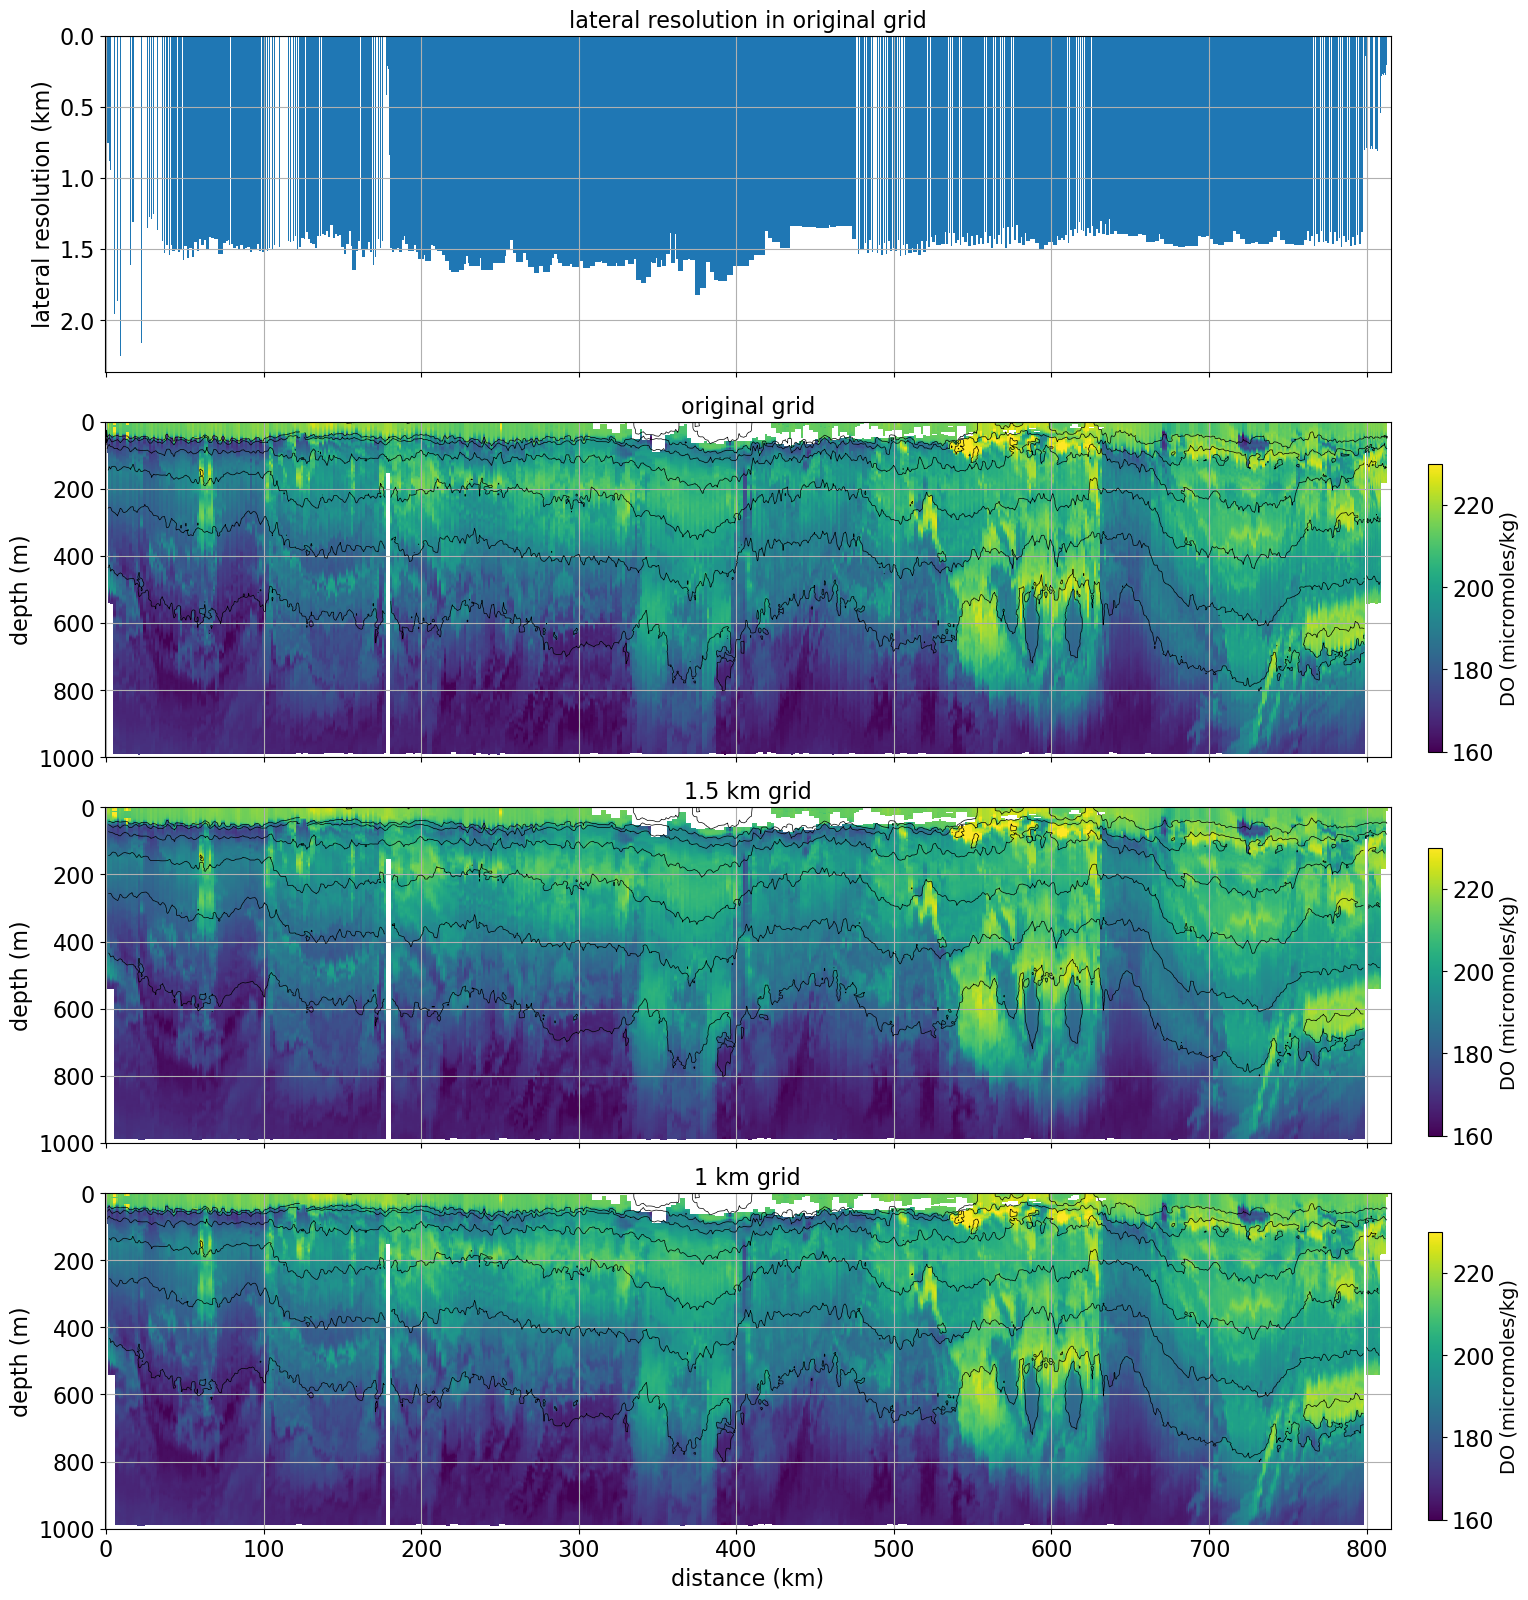

In [30]:
fig, ax = plt.subplots(4, figsize=(12, 16), sharex=True)

vmin = 160
vmax = 230

# Calculate distances between consecutive points
distances = np.diff(ds.distance)

# Create the bar chart
img0 = ax[0].bar(ds.distance[:-1], distances, align='center', width=np.diff(ds.ATD))

img1 = ax[1].pcolormesh(ds.distance, ds.ctd_depth, ds.o2, vmin=vmin, vmax=vmax)
img2 = ax[2].pcolormesh(new_grid_15, ds.ctd_depth, o2_grid_15, vmin=vmin, vmax=vmax)
img3 = ax[3].pcolormesh(new_grid_2km, ds.ctd_depth, o2_grid_2km, vmin=vmin, vmax=vmax)

[a.invert_yaxis() for a in ax]

# Create an additional Axes object for the color bars
colorbar_ax1 = fig.add_axes([1.02, 0.53, 0.01, 0.18])  # [left, bottom, width, height]
colorbar_ax2 = fig.add_axes([1.02, 0.29, 0.01, 0.18])  # [left, bottom, width, height]
colorbar_ax3 = fig.add_axes([1.02, 0.05, 0.01, 0.18])

# Add color bars to the additional Axes objects
plt.colorbar(img1, cax=colorbar_ax1).set_label('DO (micromoles/kg)')
plt.colorbar(img2, cax=colorbar_ax2).set_label('DO (micromoles/kg)')
plt.colorbar(img3, cax=colorbar_ax3).set_label('DO (micromoles/kg)')

ax[0].set_title('lateral resolution in original grid')
ax[1].set_title('original grid')
ax[2].set_title(str(grid_size_15) + ' km grid')
ax[3].set_title(str(grid_size_2km) + ' km grid')

ax[3].set_xlabel('distance (km)')
ax[0].set_ylabel('lateral resolution (km)')
ax[1].set_ylabel('depth (m)')
ax[2].set_ylabel('depth (m)')
ax[3].set_ylabel('depth (m)')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[1].contour(ds.distance, ds.ctd_depth, ds.temp, linewidths=0.5, colors='k')
ax[2].contour(new_grid_15, ds.ctd_depth, temp_grid_15, linewidths=0.5, colors='k')
ax[3].contour(new_grid_2km, ds.ctd_depth, temp_grid_2km, linewidths=0.5, colors='k')

# Increase font sizes for all text and numbers
plt.rcParams.update({'font.size': 14})  # Set the default font size

# Set font sizes for specific elements
for a in ax:
    a.set_title(a.get_title(), fontsize=16)  # Increase title font size
    a.set_xlabel(a.get_xlabel(), fontsize=16)  # Increase x-axis label font size
    a.set_ylabel(a.get_ylabel(), fontsize=16)  # Increase y-axis label font size
    a.tick_params(axis='both', which='major', labelsize=16)  # Increase tick label font size

colorbar_ax1.tick_params(axis='both', which='major', labelsize=16)  # Increase colorbar tick label font size
colorbar_ax2.tick_params(axis='both', which='major', labelsize=16)  
colorbar_ax3.tick_params(axis='both', which='major', labelsize=16)  

# Increase font size for colorbar labels
colorbar_ax1.set_ylabel(colorbar_ax1.get_ylabel(), fontsize=14)  
colorbar_ax2.set_ylabel(colorbar_ax2.get_ylabel(), fontsize=14)  
colorbar_ax3.set_ylabel(colorbar_ax3.get_ylabel(), fontsize=14)  

# Set the size and aspect ratio of the figure to match what you see on the screen
fig.set_size_inches(14, 16)
fig.tight_layout(pad=2.0)

# Save the figure
plt.savefig('resolution.png', bbox_inches='tight', dpi=100)


# Set the size and aspect ratio of the figure to match what you see on the screen
fig.set_size_inches(14, 16)
fig.tight_layout(pad=.5)

# Save the figure
plt.savefig('resolution_current_distance.png', bbox_inches='tight', dpi=100)

In [25]:
from scipy.interpolate import interp1d
def interp(x,y,xi):
    _gg = np.isfinite(x+y)
    return interp1d(x[_gg], y[_gg], bounds_error=False, fill_value='extrapolate')(xi)

lat_int = interp(ds.distance, ds.latitude.values, new_grid_15)
long_int = interp(ds.distance, ds.longitude.values, new_grid_15)
time = interp(ds.distance, ds.time.values, new_grid_15)
time[0] = 0

In [26]:
import datetime

# Create a Dataset with dimensions ctd_depth and ATD
ds_distance = xr.Dataset(
    {
        'temp': (['ctd_depth', 'distance'], temp_grid_15),
        'salinity': (['ctd_depth', 'distance'], sal_grid_15),
        'o2': (['ctd_depth', 'distance'], o2_grid_15),
        'sol': (['ctd_depth', 'distance'], sol_grid_15),
        'p': (['ctd_depth', 'distance'], p_grid_15),
        'spectral_slope': (['ctd_depth', 'distance'], slope_grid_15),
        'bp_470_grid_15': (['ctd_depth', 'distance'], bp_470_grid_15),
        'bp_700_grid_15': (['ctd_depth', 'distance'], bp_700_grid_15),
        'chl_15': (['ctd_depth', 'distance'], chl_15),
    },
    coords={
        'ctd_depth': ds.ctd_depth,
        'distance': new_grid_15,
        'long': (['distance'], long_int),
        'lat': (['distance'], lat_int),
        'time': (['distance'], time)
    }
)

# Add global attributes to the dataset
ds_distance.attrs['title'] = 'Gridded Dataset in distance relative to current'
ds_distance.attrs['description'] = 'Dataset including gridded data in distance and cleaned variables calibrated with a CTD profile.'
ds_distance.attrs['author'] = 'Renske Koets'
ds_distance.attrs['institution'] = 'Gothenburg University'
ds_distance.attrs['creation_date'] = str(datetime.date.today())
ds_distance.attrs['comment'] = 'This dataset contains temperature, salinity, oxygen, and other derived variables gridded by distance.'

# Add variable-specific attributes (units, long_name, description)
ds_distance['temp'].attrs['units'] = 'degC'
ds_distance['temp'].attrs['long_name'] = 'Concervative Temperature'
ds_distance['temp'].attrs['description'] = 'Concervative temperature measured in degrees Celsius'

ds_distance['salinity'].attrs['units'] = 'g/kg'
ds_distance['salinity'].attrs['long_name'] = 'Absolute Salinity'
ds_distance['salinity'].attrs['description'] = 'Ablsoute salinity measured in gram per kilogram'

ds_distance['o2'].attrs['units'] = 'µmol/kg'
ds_distance['o2'].attrs['long_name'] = 'Dissolved Oxygen'
ds_distance['o2'].attrs['description'] = 'Dissolved oxygen concentration in micromoles per kilogram'

ds_distance['sol'].attrs['units'] = 'µmol/kg'
ds_distance['sol'].attrs['long_name'] = 'Oxygen Solubility'
ds_distance['sol'].attrs['description'] = 'Oxygen solubility in micromoles per kilogram'

ds_distance['p'].attrs['units'] = 'dbar'
ds_distance['p'].attrs['long_name'] = 'Pressure'
ds_distance['p'].attrs['description'] = 'Water pressure measured in decibars'

ds_distance['spectral_slope'].attrs['units'] = ''
ds_distance['spectral_slope'].attrs['long_name'] = 'Spectral Slope'
ds_distance['spectral_slope'].attrs['description'] = 'Slope of the optical spectrum'

ds_distance['bp_470_grid_15'].attrs['units'] = '1/m'
ds_distance['bp_470_grid_15'].attrs['long_name'] = 'Backscatter at 470nm'
ds_distance['bp_470_grid_15'].attrs['description'] = 'Backscattering coefficient at 470nm wavelength'

ds_distance['bp_700_grid_15'].attrs['units'] = '1/m'
ds_distance['bp_700_grid_15'].attrs['long_name'] = 'Backscatter at 700nm'
ds_distance['bp_700_grid_15'].attrs['description'] = 'Backscattering coefficient at 700nm wavelength'

# Add coordinate-specific attributes
ds_distance['ctd_depth'].attrs['units'] = 'meters'
ds_distance['ctd_depth'].attrs['long_name'] = 'Depth'
ds_distance['ctd_depth'].attrs['description'] = 'Depth of the CTD profile'

ds_distance['distance'].attrs['units'] = 'km'
ds_distance['distance'].attrs['long_name'] = 'Distance based on Glider Speed Model'
ds_distance['distance'].attrs['description'] = 'Distance relative to the current in kilometers'

ds_distance['long'].attrs['units'] = 'degrees_east'
ds_distance['long'].attrs['long_name'] = 'Longitude'
ds_distance['long'].attrs['description'] = 'Longitude of each distance point'

ds_distance['lat'].attrs['units'] = 'degrees_north'
ds_distance['lat'].attrs['long_name'] = 'Latitude'
ds_distance['lat'].attrs['description'] = 'Latitude of each distance point'

ds_distance['time'].attrs['units'] = 'days since 2023-03-22, 8:33:43'
ds_distance['time'].attrs['long_name'] = 'date'
ds_distance['time'].attrs['description'] = 'Time in days corresponding to each distance point since 2023-03-22, 8:33:43'


In [27]:


ds_distance.to_netcdf('ds_distance_alg.nc')

# Create grid with 5 km and 2 km ATD spacing

Oxygen

In [35]:
grid_size_5 = 5 # 5 km grid spacing

new_grid_5 = np.arange(0, ds.ATD[-1] + grid_size_5, grid_size_5)

o2_grid_5 = np.ndarray([ds.ctd_depth.size, new_grid_5.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.o2.isel(ctd_depth=i)

    o2_grid_5[i] = griddata(ds.ATD.data, ds_depth, new_grid_5)

In [36]:
grid_size_2 = 2 # 2 km grid spacing

new_grid_2 = np.arange(0, ds.ATD[-1] + grid_size_2, grid_size_2)

o2_grid_2 = np.ndarray([ds.ctd_depth.size, new_grid_2.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.o2.isel(ctd_depth=i)

    o2_grid_2[i] = griddata(ds.ATD.data, ds_depth, new_grid_2)

Temperature

In [37]:
grid_size_5 = 5 # 5 km grid spacing

new_grid_5 = np.arange(0, ds.ATD[-1] + grid_size_5, grid_size_5)

temp_grid_5 = np.ndarray([ds.ctd_depth.size, new_grid_5.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.temp.isel(ctd_depth=i)

    temp_grid_5[i] = griddata(ds.ATD.data, ds_depth, new_grid_5)

In [38]:
grid_size_2 = 2 # 2 km grid spacing

new_grid_2 = np.arange(0, ds.ATD[-1] + grid_size_2, grid_size_2)

temp_grid_2 = np.ndarray([ds.ctd_depth.size, new_grid_2.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.temp.isel(ctd_depth=i)

    temp_grid_2[i] = griddata(ds.ATD.data, ds_depth, new_grid_2)

Salinity

In [39]:
grid_size_5 = 5 # 5 km grid spacing

new_grid_5 = np.arange(0, ds.ATD[-1] + grid_size_5, grid_size_5)

sal_grid_5 = np.ndarray([ds.ctd_depth.size, new_grid_5.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.salinity.isel(ctd_depth=i)

    sal_grid_5[i] = griddata(ds.ATD.data, ds_depth, new_grid_5)

In [40]:
grid_size_2 = 2 # 2 km grid spacing

new_grid_2 = np.arange(0, ds.ATD[-1] + grid_size_2, grid_size_2)

sal_grid_2 = np.ndarray([ds.ctd_depth.size, new_grid_2.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.salinity.isel(ctd_depth=i)

    sal_grid_2[i] = griddata(ds.ATD.data, ds_depth, new_grid_2)

Solubility

In [41]:
grid_size_2 = 2 # 2 km grid spacing

new_grid_2 = np.arange(0, ds.ATD[-1] + grid_size_2, grid_size_2)

sol_grid_2 = np.ndarray([ds.ctd_depth.size, new_grid_2.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.sol.isel(ctd_depth=i)

    sol_grid_2[i] = griddata(ds.ATD.data, ds_depth, new_grid_2)

Pressure

In [42]:
grid_size_2 = 2 # 2 km grid spacing

new_grid_2 = np.arange(0, ds.ATD[-1] + grid_size_2, grid_size_2)

p_grid_2 = np.ndarray([ds.ctd_depth.size, new_grid_2.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.p.isel(ctd_depth=i)

    p_grid_2[i] = griddata(ds.ATD.data, ds_depth, new_grid_2)

# Compare the 2 different grid sizes

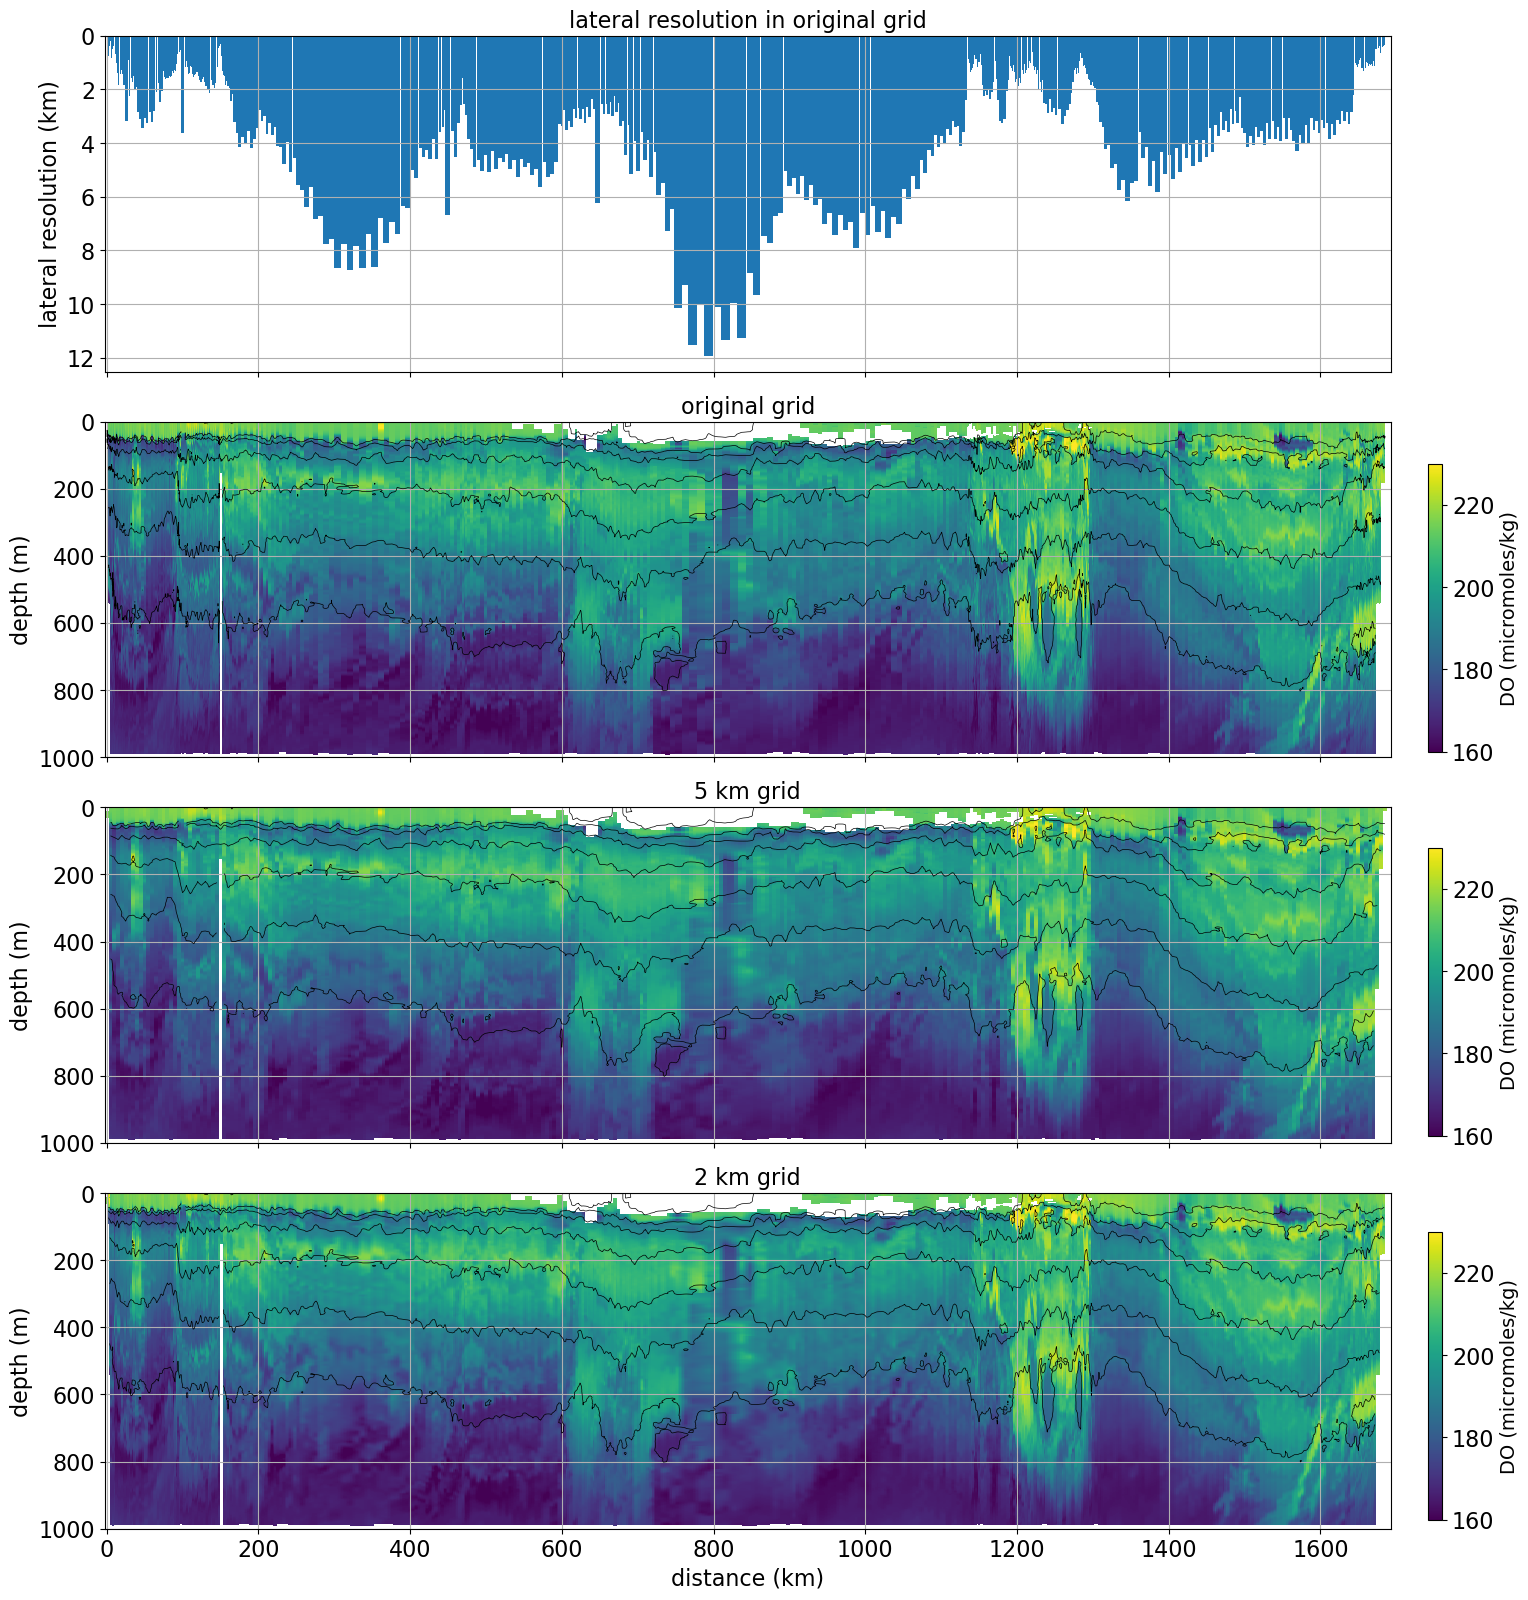

In [43]:
fig, ax = plt.subplots(4, figsize=(12, 16), sharex=True)

vmin = 160
vmax = 230

# Calculate distances between consecutive points
distances = np.diff(ds.ATD)

# Create the bar chart
img0 = ax[0].bar(ds.ATD[:-1], distances, align='center', width=np.diff(ds.ATD))

img1 = ax[1].pcolormesh(ds.ATD, ds.ctd_depth, ds.o2, vmin=vmin, vmax=vmax)
img2 = ax[2].pcolormesh(new_grid_5, ds.ctd_depth, o2_grid_5, vmin=vmin, vmax=vmax)
img3 = ax[3].pcolormesh(new_grid_2, ds.ctd_depth, o2_grid_2, vmin=vmin, vmax=vmax)

[a.invert_yaxis() for a in ax]

# Create an additional Axes object for the color bars
colorbar_ax1 = fig.add_axes([1.02, 0.53, 0.01, 0.18])  # [left, bottom, width, height]
colorbar_ax2 = fig.add_axes([1.02, 0.29, 0.01, 0.18])  # [left, bottom, width, height]
colorbar_ax3 = fig.add_axes([1.02, 0.05, 0.01, 0.18])

# Add color bars to the additional Axes objects
plt.colorbar(img1, cax=colorbar_ax1).set_label('DO (micromoles/kg)')
plt.colorbar(img2, cax=colorbar_ax2).set_label('DO (micromoles/kg)')
plt.colorbar(img3, cax=colorbar_ax3).set_label('DO (micromoles/kg)')

ax[0].set_title('lateral resolution in original grid')
ax[1].set_title('original grid')
ax[2].set_title(str(grid_size_5) + ' km grid')
ax[3].set_title(str(grid_size_2) + ' km grid')

ax[3].set_xlabel('distance (km)')
ax[0].set_ylabel('lateral resolution (km)')
ax[1].set_ylabel('depth (m)')
ax[2].set_ylabel('depth (m)')
ax[3].set_ylabel('depth (m)')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[1].contour(ds.ATD, ds.ctd_depth, ds.temp, linewidths=0.5, colors='k')
ax[2].contour(new_grid_5, ds.ctd_depth, temp_grid_5, linewidths=0.5, colors='k')
ax[3].contour(new_grid_2, ds.ctd_depth, temp_grid_2, linewidths=0.5, colors='k')

# Increase font sizes for all text and numbers
plt.rcParams.update({'font.size': 14})  # Set the default font size

# Set font sizes for specific elements
for a in ax:
    a.set_title(a.get_title(), fontsize=16)  # Increase title font size
    a.set_xlabel(a.get_xlabel(), fontsize=16)  # Increase x-axis label font size
    a.set_ylabel(a.get_ylabel(), fontsize=16)  # Increase y-axis label font size
    a.tick_params(axis='both', which='major', labelsize=16)  # Increase tick label font size

colorbar_ax1.tick_params(axis='both', which='major', labelsize=16)  # Increase colorbar tick label font size
colorbar_ax2.tick_params(axis='both', which='major', labelsize=16)  
colorbar_ax3.tick_params(axis='both', which='major', labelsize=16)  

# Increase font size for colorbar labels
colorbar_ax1.set_ylabel(colorbar_ax1.get_ylabel(), fontsize=14)  
colorbar_ax2.set_ylabel(colorbar_ax2.get_ylabel(), fontsize=14)  
colorbar_ax3.set_ylabel(colorbar_ax3.get_ylabel(), fontsize=14)  

# Set the size and aspect ratio of the figure to match what you see on the screen
fig.set_size_inches(14, 16)
fig.tight_layout(pad=2.0)

# Save the figure
plt.savefig('resolution.png', bbox_inches='tight', dpi=100)


# Set the size and aspect ratio of the figure to match what you see on the screen
fig.set_size_inches(14, 16)
fig.tight_layout(pad=.5)

# Save the figure
plt.savefig('resolution.png', bbox_inches='tight', dpi=100)

# create a grid in ATD

In [44]:
from scipy.interpolate import interp1d
def interp(x,y,xi):
    _gg = np.isfinite(x+y)
    return interp1d(x[_gg], y[_gg], bounds_error=False, fill_value=np.NaN)(xi)

lat_int = interp(cumulative_distances, ds.latitude.values, new_grid_2)
long_int = interp(cumulative_distances, ds.longitude.values, new_grid_2)
time = interp(cumulative_distances, ds.time, new_grid_2)

In [45]:
average_latitude = ds_work.latitude.groupby('dives').mean()
average_longitude = ds_work.longitude.groupby('dives').mean()


# Create a Dataset with dimensions ctd_depth and ATD
ds_ATD = xr.Dataset(
    {'temp': (['ctd_depth', 'ATD'], temp_grid_2),
     'salinity': (['ctd_depth', 'ATD'], sal_grid_2),
     'o2': (['ctd_depth', 'ATD'], o2_grid_2),
     'sol': (['ctd_depth', 'ATD'], sol_grid_2),
     'p': (['ctd_depth', 'ATD'], p_grid_2),
     },
    coords={'ctd_depth': ds.ctd_depth,
            'ATD': new_grid_2,
            'long':(['ATD'] , long_int),
            'lat': (['ATD'] , lat_int),
            'time':(['ATD'], time)
            }
)

# Add attributes to the dataset
ds_ATD.attrs['description'] = 'dataset including gridded data ATD and cleaned variables'


ds_ATD


<xarray.Dataset>
Dimensions:    (ctd_depth: 2001, ATD: 844)
Coordinates:
  * ctd_depth  (ctd_depth) float64 0.0 0.5 1.0 1.5 ... 998.5 999.0 999.5 1e+03
  * ATD        (ATD) float64 0.0 2.0 4.0 6.0 ... 1.682e+03 1.684e+03 1.686e+03
    long       (ATD) float64 17.32 17.34 17.35 17.35 ... 16.86 16.84 16.82 nan
    lat        (ATD) float64 -37.52 -37.53 -37.54 -37.54 ... -34.2 -34.19 nan
    time       (ATD) float64 0.0 0.1305 0.3513 0.8389 ... 61.89 62.02 62.16 nan
Data variables:
    temp       (ctd_depth, ATD) float64 nan nan nan nan nan ... nan nan nan nan
    salinity   (ctd_depth, ATD) float64 nan nan nan nan nan ... nan nan nan nan
    o2         (ctd_depth, ATD) float64 nan 214.4 212.8 211.7 ... nan nan nan
    sol        (ctd_depth, ATD) float64 nan nan nan nan nan ... nan nan nan nan
    p          (ctd_depth, ATD) float64 0.3903 0.608 0.5716 ... nan nan nan
Attributes:
    description:  dataset including gridded data ATD and cleaned variables

In [46]:
ds_ATD.to_netcdf('ds_ATD.nc')

# Grid in time

In [48]:
# Calculate distances between consecutive points
deltaT_h = np.diff(ds.time)*24

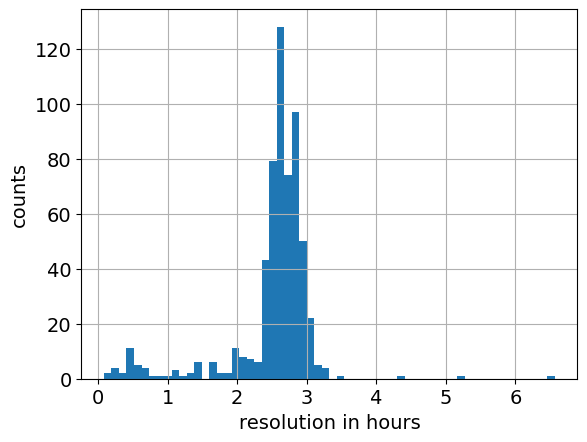

In [49]:
plt.hist(deltaT_h, bins=60)
plt.xlabel('resolution in hours')
plt.ylabel('counts')
plt.grid()

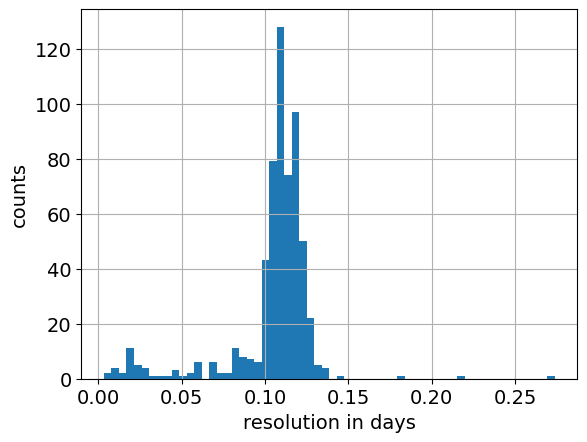

In [50]:
deltaT= np.diff(ds.time)
plt.hist(deltaT, bins=60)
plt.xlabel('resolution in days')
plt.ylabel('counts')
plt.grid()

In [53]:
grid_size_01 = 0.1 # 0.1  grid spacing

new_grid_01 = np.arange(0, ds.time[-1] + grid_size_01, grid_size_01)

o2_grid_01 = np.ndarray([ds.ctd_depth.size, new_grid_01.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.o2.isel(ctd_depth=i)

    o2_grid_01[i] = griddata(ds.time.data, ds_depth, new_grid_01)

In [54]:
grid_size_01 = 0.1 # 0.1  grid spacing

new_grid_01 = np.arange(0, ds.time[-1] + grid_size_01, grid_size_01)

temp_grid_01 = np.ndarray([ds.ctd_depth.size, new_grid_01.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.temp.isel(ctd_depth=i)

    temp_grid_01[i] = griddata(ds.time.data, ds_depth, new_grid_01)

In [55]:
grid_size_01 = 0.1 # 0.1  grid spacing

new_grid_01 = np.arange(0, ds.time[-1] + grid_size_01, grid_size_01)

sal_grid_01 = np.ndarray([ds.ctd_depth.size, new_grid_01.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.salinity.isel(ctd_depth=i)

    sal_grid_01[i] = griddata(ds.time.data, ds_depth, new_grid_01)

In [56]:
grid_size_01 = 0.1 # 0.1 grid spacing

new_grid_01 = np.arange(0, ds.time[-1] + grid_size_01, grid_size_01)

sol_grid_01 = np.ndarray([ds.ctd_depth.size, new_grid_01.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.sol.isel(ctd_depth=i)

    sol_grid_01[i] = griddata(ds.time.data, ds_depth, new_grid_01)

In [57]:
grid_size_01 = 0.1 # 0.1  grid spacing

new_grid_01 = np.arange(0, ds.time[-1] + grid_size_01, grid_size_01)

p_grid_01 = np.ndarray([ds.ctd_depth.size, new_grid_01.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.p.isel(ctd_depth=i)

    p_grid_01[i] = griddata(ds.time.data, ds_depth, new_grid_01)

In [56]:
grid_size_012 = 0.12 # 0.12 grid spacing

new_grid_012 = np.arange(0, ds.time[-1] + grid_size_012, grid_size_012)

o2_grid_012 = np.ndarray([ds.ctd_depth.size, new_grid_012.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.o2.isel(ctd_depth=i)

    o2_grid_012[i] = griddata(ds.time.data, ds_depth, new_grid_012)

In [57]:
grid_size_012 = 0.12 # 0.12  grid spacing

new_grid_012 = np.arange(0, ds.time[-1] + grid_size_012, grid_size_012)

temp_grid_012 = np.ndarray([ds.ctd_depth.size, new_grid_012.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.temp.isel(ctd_depth=i)

    temp_grid_012[i] = griddata(ds.time.data, ds_depth, new_grid_012)

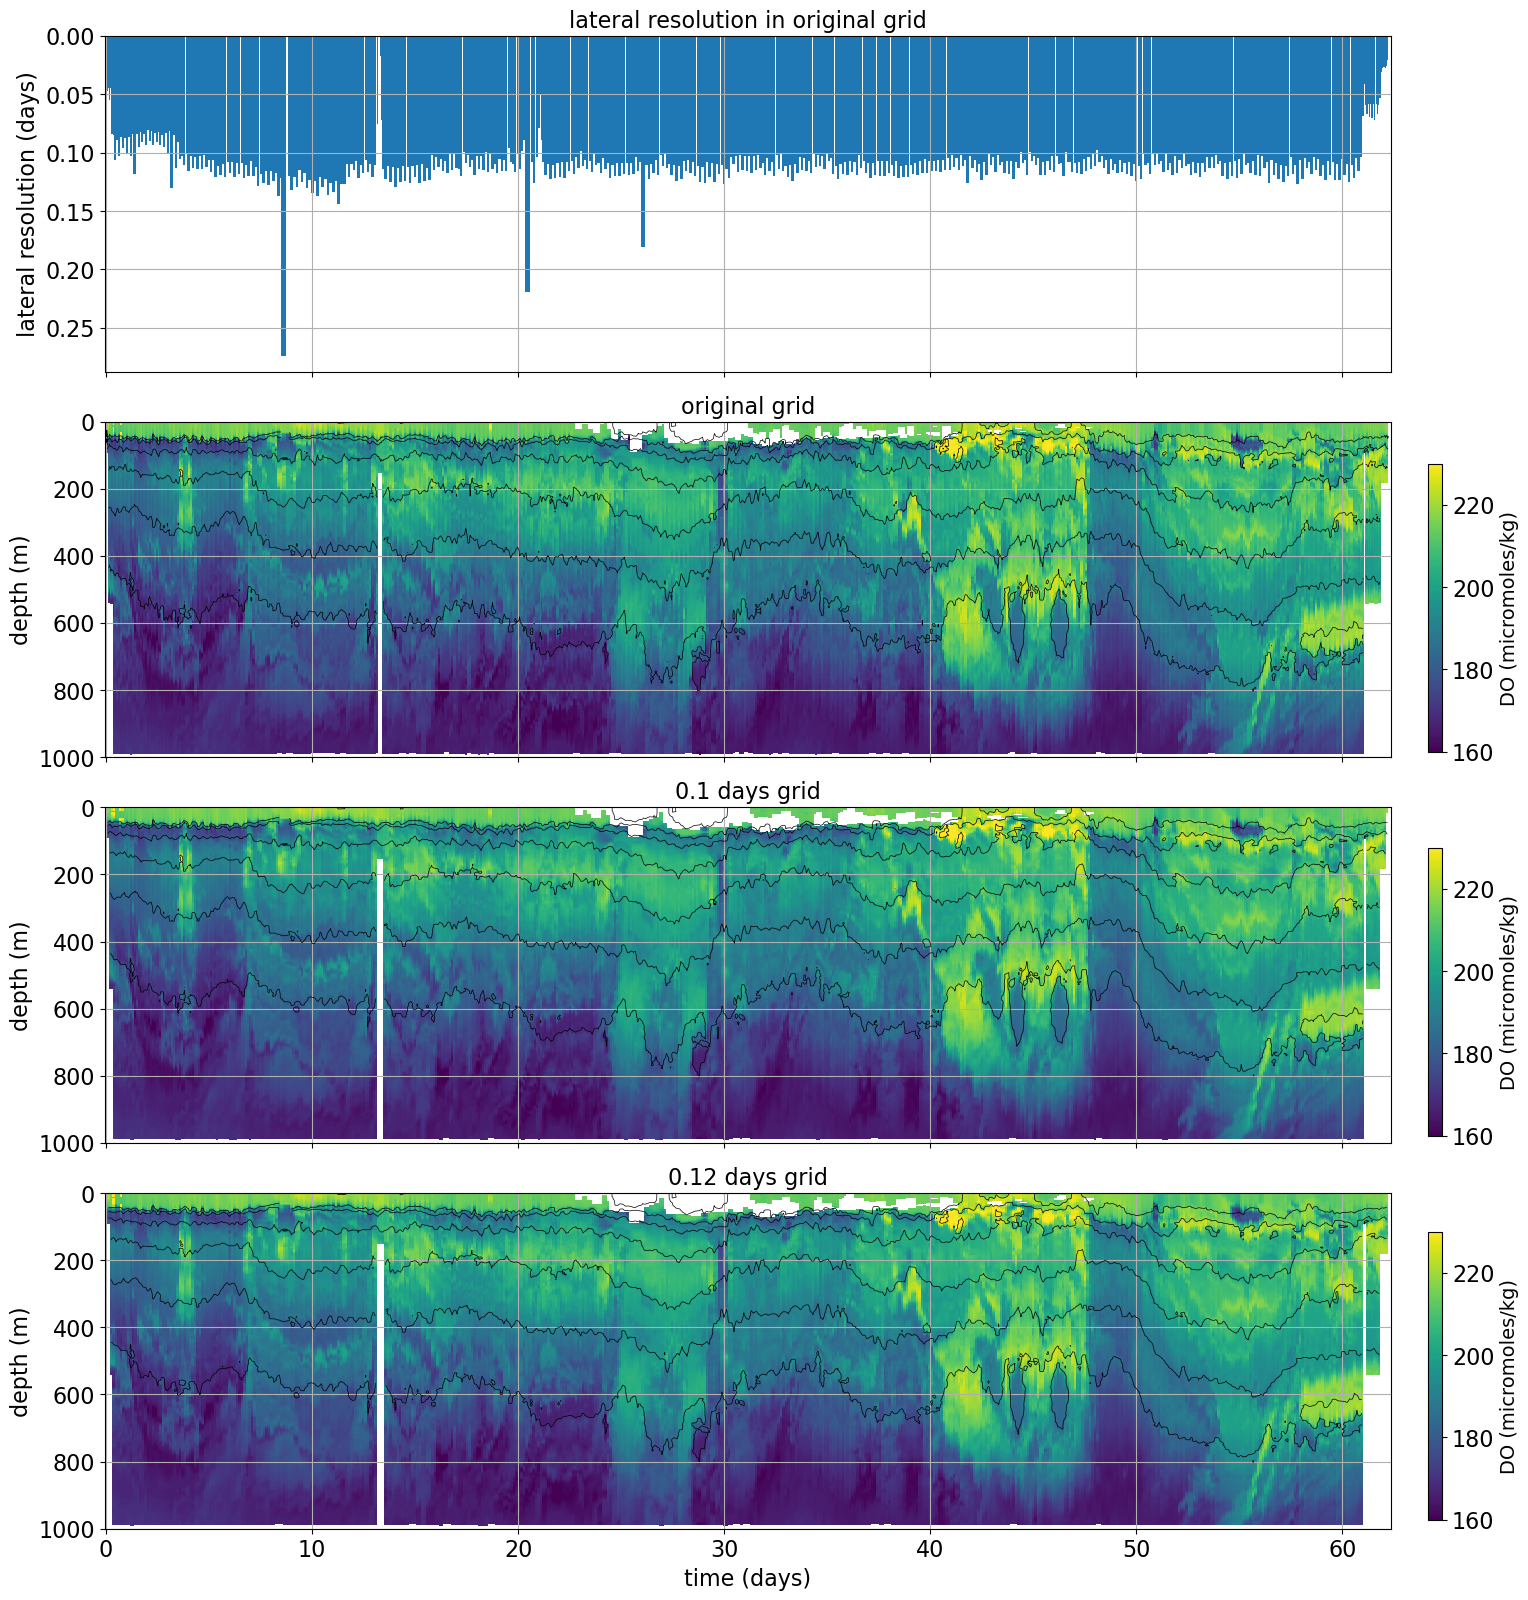

In [58]:
fig, ax = plt.subplots(4, figsize=(12, 16), sharex=True)

vmin = 160
vmax = 230

# Calculate distances between consecutive points
deltaT = np.diff(ds.time)

# Create the bar chart
img0 = ax[0].bar(ds.time[:-1], deltaT, align='center', width=np.diff(ds.time))

img1 = ax[1].pcolormesh(ds.time, ds.ctd_depth, ds.o2, vmin=vmin, vmax=vmax)
img2 = ax[2].pcolormesh(new_grid_01, ds.ctd_depth, o2_grid_01, vmin=vmin, vmax=vmax)
img3 = ax[3].pcolormesh(new_grid_012, ds.ctd_depth, o2_grid_012, vmin=vmin, vmax=vmax)

[a.invert_yaxis() for a in ax]

# Create an additional Axes object for the color bars
colorbar_ax1 = fig.add_axes([1.02, 0.53, 0.01, 0.18])  # [left, bottom, width, height]
colorbar_ax2 = fig.add_axes([1.02, 0.29, 0.01, 0.18])  # [left, bottom, width, height]
colorbar_ax3 = fig.add_axes([1.02, 0.05, 0.01, 0.18])

# Add color bars to the additional Axes objects
plt.colorbar(img1, cax=colorbar_ax1).set_label('DO (micromoles/kg)')
plt.colorbar(img2, cax=colorbar_ax2).set_label('DO (micromoles/kg)')
plt.colorbar(img3, cax=colorbar_ax3).set_label('DO (micromoles/kg)')

ax[0].set_title('lateral resolution in original grid')
ax[1].set_title('original grid')
ax[2].set_title(str(grid_size_01) + ' days grid')
ax[3].set_title(str(grid_size_012) + ' days grid')

ax[3].set_xlabel('time (days)')
ax[0].set_ylabel('lateral resolution (days)')
ax[1].set_ylabel('depth (m)')
ax[2].set_ylabel('depth (m)')
ax[3].set_ylabel('depth (m)')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[1].contour(ds.time, ds.ctd_depth, ds.temp, linewidths=0.5, colors='k')
ax[2].contour(new_grid_01, ds.ctd_depth, temp_grid_01, linewidths=0.5, colors='k')
ax[3].contour(new_grid_012, ds.ctd_depth, temp_grid_012, linewidths=0.5, colors='k')

# Increase font sizes for all text and numbers
plt.rcParams.update({'font.size': 14})  # Set the default font size

# Set font sizes for specific elements
for a in ax:
    a.set_title(a.get_title(), fontsize=16)  # Increase title font size
    a.set_xlabel(a.get_xlabel(), fontsize=16)  # Increase x-axis label font size
    a.set_ylabel(a.get_ylabel(), fontsize=16)  # Increase y-axis label font size
    a.tick_params(axis='both', which='major', labelsize=16)  # Increase tick label font size

colorbar_ax1.tick_params(axis='both', which='major', labelsize=16)  # Increase colorbar tick label font size
colorbar_ax2.tick_params(axis='both', which='major', labelsize=16)  
colorbar_ax3.tick_params(axis='both', which='major', labelsize=16)  

# Increase font size for colorbar labels
colorbar_ax1.set_ylabel(colorbar_ax1.get_ylabel(), fontsize=14)  
colorbar_ax2.set_ylabel(colorbar_ax2.get_ylabel(), fontsize=14)  
colorbar_ax3.set_ylabel(colorbar_ax3.get_ylabel(), fontsize=14)  


# Set the size and aspect ratio of the figure to match what you see on the screen
fig.set_size_inches(14, 16)
fig.tight_layout(pad=.5)

# Save the figure
plt.savefig('resolutiontime.png', bbox_inches='tight', dpi=100)

# Create time grid

In [66]:
from scipy.interpolate import interp1d
def interp(x,y,xi):
    _gg = np.isfinite(x+y)
    return interp1d(x[_gg], y[_gg], bounds_error=False, fill_value='extrapolate')(xi)

lat_int = interp(days_elapsed, average_latitude.values, new_grid_01)
long_int = interp(days_elapsed, average_longitude.values, new_grid_01)
#time = interp(days_elapsed, ds.ATD, new_grid_01)
distance_int = interp(days_elapsed, ds.ATD, new_grid_01)

In [68]:
# Create a Dataset with dimensions ctd_depth and ATD
ds_time = xr.Dataset(
    {'temp': (['ctd_depth', 'time'], temp_grid_01),
     'salinity': (['ctd_depth', 'time'], sal_grid_01),
     'o2': (['ctd_depth', 'time'], o2_grid_01),
     'sol': (['ctd_depth', 'time'], sol_grid_01),
     'p': (['ctd_depth', 'time'], p_grid_01)},
    coords={'ctd_depth': ds.ctd_depth,
            'time': new_grid_01,
            'long':(['time'] , long_int),
            'lat': (['time'] , lat_int),
            'distance': (['time'], distance_int )          }
)

# Add dataset-level attributes
ds_time.attrs['description'] = 'Gridded time-series with cleaned variables and calibrated with a CTD-profile.'
ds_time.attrs['author'] = 'Renske Koets'
ds_time.attrs['institution'] = 'Gothenburg University'
ds_time.attrs['created'] = pd.Timestamp.now().isoformat()

# Add variable-level attributes
ds_time['temp'].attrs['long_name'] = 'Concervative Temperature'
ds_time['temp'].attrs['units'] = 'degC'
ds_time['salinity'].attrs['long_name'] = 'Absolute Salinity'
ds_time['salinity'].attrs['units'] = 'g/kg'
ds_time['o2'].attrs['long_name'] = 'Oxygen Concentration'
ds_time['o2'].attrs['units'] = 'umol/kg'
ds_time['sol'].attrs['long_name'] = 'Oxygen Solubility'
ds_time['sol'].attrs['units'] = 'umol/kg'
ds_time['p'].attrs['long_name'] = 'Pressure'
ds_time['p'].attrs['units'] = 'dbar'

# Add coordinate attributes
ds_time['ctd_depth'].attrs['long_name'] = 'CTD Depth'
ds_time['ctd_depth'].attrs['units'] = 'm'

ds_time['time'].attrs['units'] = 'days since 2023-03-22, 8:33:43'
ds_time['time'].attrs['long_name'] = 'date'
ds_time['time'].attrs['description'] = 'Time in days corresponding to each distance point since 2023-03-22, 8:33:43'

ds_time['long'].attrs['long_name'] = 'Longitude'
ds_time['long'].attrs['units'] = 'degrees_east'
ds_time['lat'].attrs['long_name'] = 'Latitude'
ds_time['lat'].attrs['units'] = 'degrees_north'
ds_time['distance'].attrs['long_name'] = 'Distance based on GSM'
ds_time['distance'].attrs['units'] = 'km'



ds_time


<xarray.Dataset>
Dimensions:    (ctd_depth: 2001, time: 624)
Coordinates:
  * ctd_depth  (ctd_depth) float64 0.0 0.5 1.0 1.5 ... 998.5 999.0 999.5 1e+03
  * time       (time) float64 0.0 0.1 0.2 0.3 0.4 ... 61.9 62.0 62.1 62.2 62.3
    long       (time) float64 17.32 17.34 17.35 17.35 ... 16.83 16.82 16.81
    lat        (time) float64 -37.52 -37.53 -37.54 ... -34.19 -34.18 -34.17
    distance   (time) float64 0.0 1.573 3.091 ... 1.683e+03 1.685e+03 1.687e+03
Data variables:
    temp       (ctd_depth, time) float64 nan nan nan nan nan ... nan nan nan nan
    salinity   (ctd_depth, time) float64 nan nan nan nan nan ... nan nan nan nan
    o2         (ctd_depth, time) float64 nan 214.3 214.4 213.7 ... nan nan nan
    sol        (ctd_depth, time) float64 nan nan nan nan nan ... nan nan nan nan
    p          (ctd_depth, time) float64 0.3903 0.3612 0.4708 ... nan nan nan
Attributes:
    description:  Gridded time-series with cleaned variables and calibrated w...
    author:       Renske Koets
    institution:  Gothenburg University
    created:      2024-10-05T19:08:09.597550

In [69]:
ds_time.to_netcdf('ds_time.nc')

# Grid time in hour

In [62]:
grid_size_25 = 2.5 # 2.5 grid spacing

new_grid_25 = np.arange(0, ds.time[-1]*24 + grid_size_25, grid_size_25)

o2_grid_25 = np.ndarray([ds.ctd_depth.size, new_grid_25.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.o2.isel(ctd_depth=i)

    o2_grid_25[i] = griddata(ds.time.data*24, ds_depth, new_grid_25)

In [63]:
grid_size_25 = 2.5 # 2.5 grid spacing

new_grid_25 = np.arange(0, ds.time[-1]*24 + grid_size_25, grid_size_25)

temp_grid_25 = np.ndarray([ds.ctd_depth.size, new_grid_25.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.temp.isel(ctd_depth=i)

    temp_grid_25[i] = griddata(ds.time.data*24, ds_depth, new_grid_25)

In [64]:
grid_size_3 = 3 # 3 km grid spacing

new_grid_3 = np.arange(0, ds.time[-1]*24 + grid_size_3, grid_size_3)

o2_grid_3 = np.ndarray([ds.ctd_depth.size, new_grid_3.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.o2.isel(ctd_depth=i)

    o2_grid_3[i] = griddata(ds.time.data*24, ds_depth, new_grid_3)

In [65]:
grid_size_3 = 3 # 3 km grid spacing

new_grid_3 = np.arange(0, ds.time[-1]*24 + grid_size_3, grid_size_3)

temp_grid_3 = np.ndarray([ds.ctd_depth.size, new_grid_3.size])

for i, d in enumerate(ds.ctd_depth.data):

    ds_depth = ds.temp.isel(ctd_depth=i)

    temp_grid_3[i] = griddata(ds.time.data*24, ds_depth, new_grid_3)

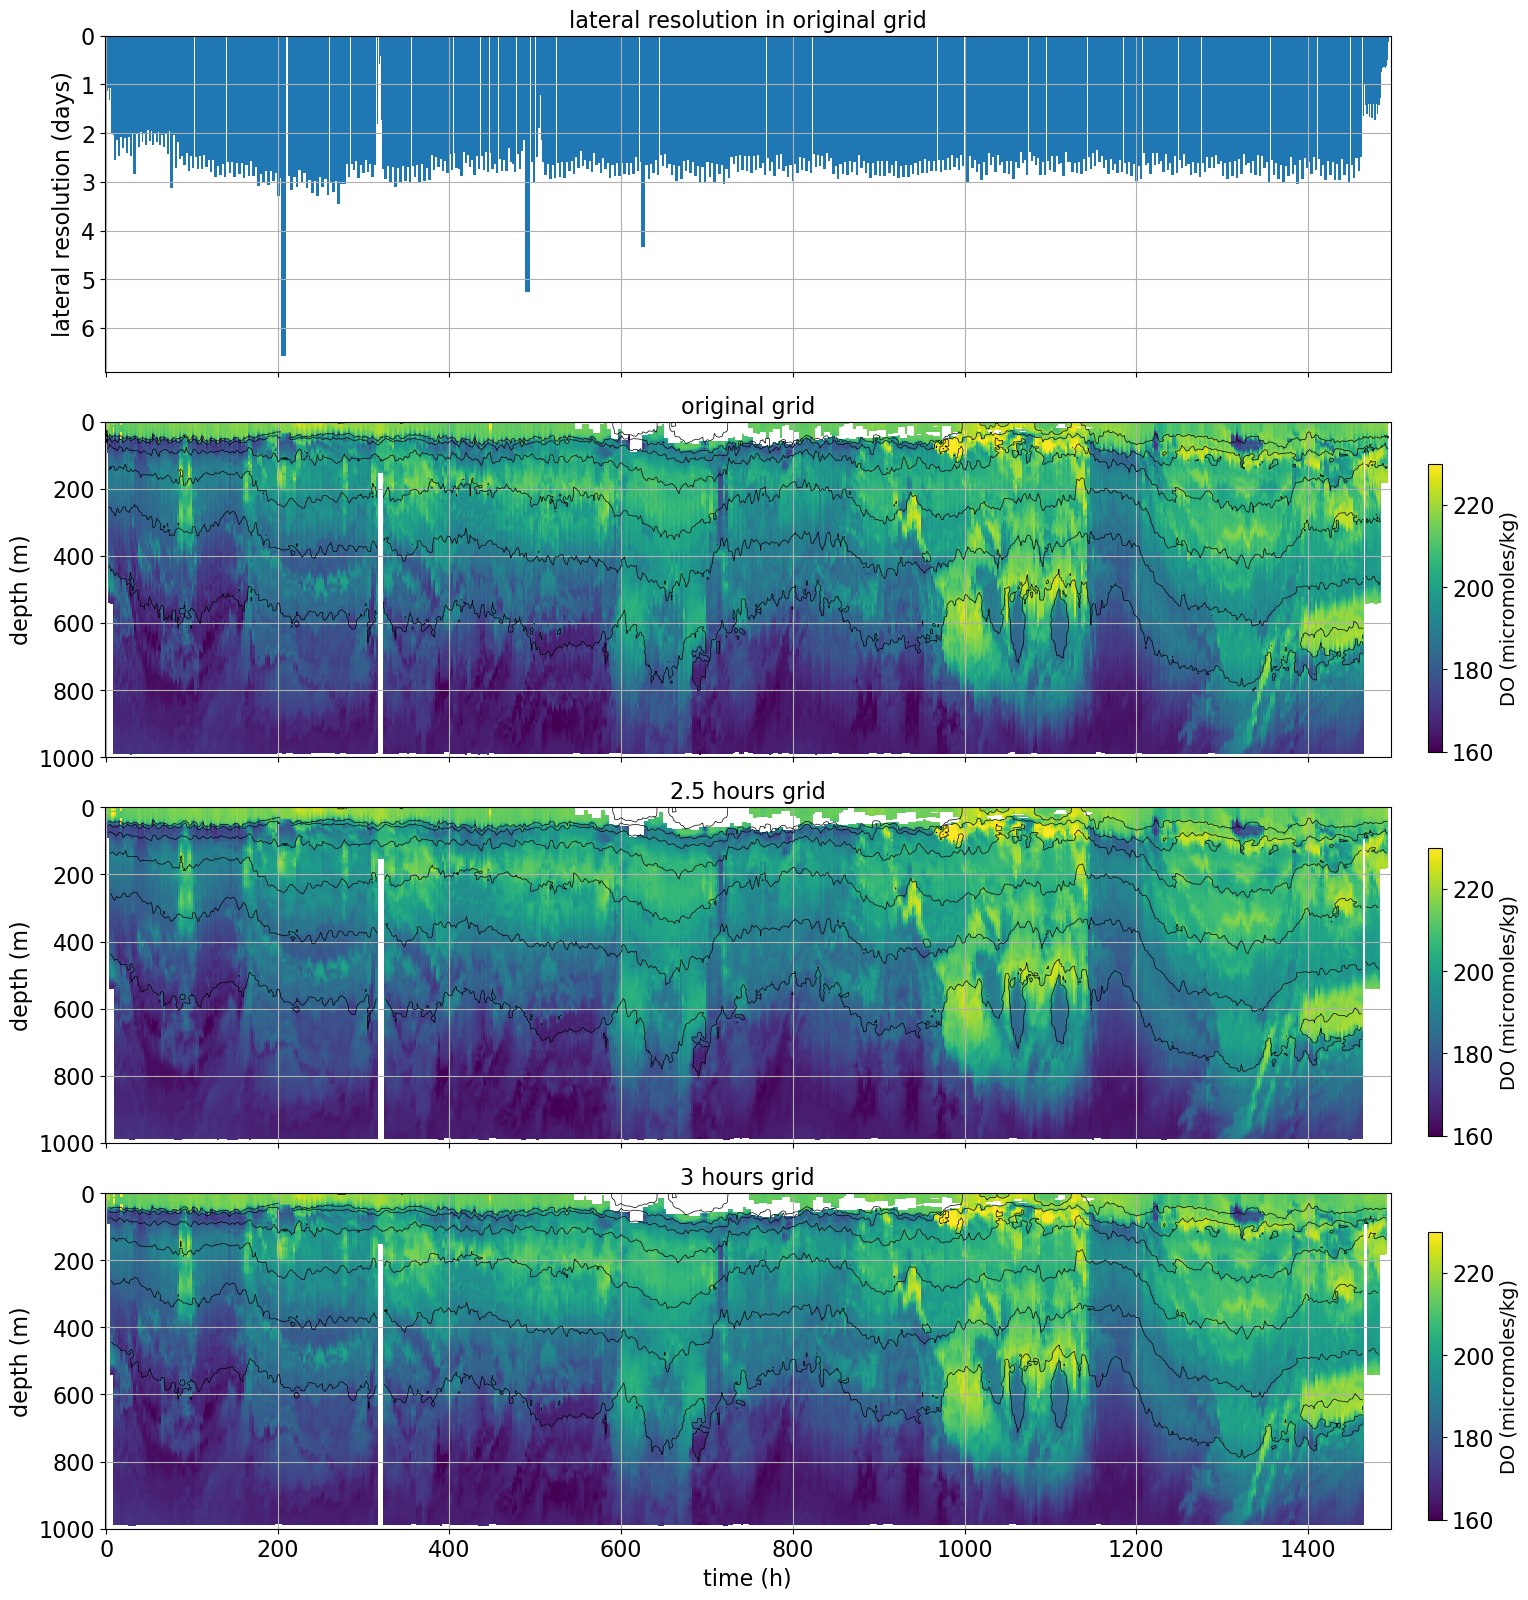

In [66]:
fig, ax = plt.subplots(4, figsize=(12, 16), sharex=True)

vmin = 160
vmax = 230

# Calculate distances between consecutive points
deltaT = np.diff(ds.time)*24

# Create the bar chart
img0 = ax[0].bar(ds.time[:-1]*24, deltaT, align='center', width=np.diff(ds.time)*24)

img1 = ax[1].pcolormesh(ds.time*24, ds.ctd_depth, ds.o2, vmin=vmin, vmax=vmax)
img2 = ax[2].pcolormesh(new_grid_25, ds.ctd_depth, o2_grid_25, vmin=vmin, vmax=vmax)
img3 = ax[3].pcolormesh(new_grid_3, ds.ctd_depth, o2_grid_3, vmin=vmin, vmax=vmax)

[a.invert_yaxis() for a in ax]

# Create an additional Axes object for the color bars
colorbar_ax1 = fig.add_axes([1.02, 0.53, 0.01, 0.18])  # [left, bottom, width, height]
colorbar_ax2 = fig.add_axes([1.02, 0.29, 0.01, 0.18])  # [left, bottom, width, height]
colorbar_ax3 = fig.add_axes([1.02, 0.05, 0.01, 0.18])

# Add color bars to the additional Axes objects
plt.colorbar(img1, cax=colorbar_ax1).set_label('DO (micromoles/kg)')
plt.colorbar(img2, cax=colorbar_ax2).set_label('DO (micromoles/kg)')
plt.colorbar(img3, cax=colorbar_ax3).set_label('DO (micromoles/kg)')

ax[0].set_title('lateral resolution in original grid')
ax[1].set_title('original grid')
ax[2].set_title(str(grid_size_25) + ' hours grid')
ax[3].set_title(str(grid_size_3) + ' hours grid')

ax[3].set_xlabel('time (h)')
ax[0].set_ylabel('lateral resolution (days)')
ax[1].set_ylabel('depth (m)')
ax[2].set_ylabel('depth (m)')
ax[3].set_ylabel('depth (m)')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[1].contour(ds.time*24, ds.ctd_depth, ds.temp, linewidths=0.5, colors='k')
ax[2].contour(new_grid_25, ds.ctd_depth, temp_grid_25, linewidths=0.5, colors='k')
ax[3].contour(new_grid_3, ds.ctd_depth, temp_grid_3, linewidths=0.5, colors='k')

# Increase font sizes for all text and numbers
plt.rcParams.update({'font.size': 14})  # Set the default font size

# Set font sizes for specific elements
for a in ax:
    a.set_title(a.get_title(), fontsize=16)  # Increase title font size
    a.set_xlabel(a.get_xlabel(), fontsize=16)  # Increase x-axis label font size
    a.set_ylabel(a.get_ylabel(), fontsize=16)  # Increase y-axis label font size
    a.tick_params(axis='both', which='major', labelsize=16)  # Increase tick label font size

colorbar_ax1.tick_params(axis='both', which='major', labelsize=16)  # Increase colorbar tick label font size
colorbar_ax2.tick_params(axis='both', which='major', labelsize=16)  
colorbar_ax3.tick_params(axis='both', which='major', labelsize=16)  

# Increase font size for colorbar labels
colorbar_ax1.set_ylabel(colorbar_ax1.get_ylabel(), fontsize=14)  
colorbar_ax2.set_ylabel(colorbar_ax2.get_ylabel(), fontsize=14)  
colorbar_ax3.set_ylabel(colorbar_ax3.get_ylabel(), fontsize=14)  


# Set the size and aspect ratio of the figure to match what you see on the screen
fig.set_size_inches(14, 16)
fig.tight_layout(pad=.5)

# Save the figure
plt.savefig('resolutiontimehours.png', bbox_inches='tight', dpi=100)